In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function that returns the Cross-Validation log_loss score
def get_log_loss(grid_search_obj):
    print("Best log_loss score: {:.5f}".format(-1 * grid_search_obj.best_score_))

In [3]:
# Function that uses RandomForest to return most important features
def rf_feature_selection(df, X, y):
    # Create a random forest
    from sklearn.ensemble import RandomForestClassifier

    # Get the columns
    cols = df.columns[3:-1]

    # Make the forest
    forest = RandomForestClassifier(n_estimators=100, n_jobs=2)

    # Fit
    forest.fit(X,y)

    # Get the importances
    importances = forest.feature_importances_

    # Get the indices
    indices = np.argsort(importances)[::-1]

    # Show the importance of each feature
    for f in range(X.shape[1]):
        print("{} - {}".format(cols[f], importances[indices[f]]))

In [19]:
# Function that takes the probabilities and ids and saves them to a CSV file
def save_predictions(probabilities, tourney_df, tournament_nbr=60):
    import pandas as pd
    
    # Get the probability of 1
    prob_of_one = probabilities[:, 1]
    
    # Get the IDs
    ids = tourney_df['id']
    
    # Join the data into one DataFrame
    results = pd.DataFrame(data={'probability': prob_of_one})
    results = pd.DataFrame(ids).join(results)
    
    # Save to CSV
    results.to_csv("probabilities_{}.csv".format(tournament_nbr), index=False)

In [4]:
# Load the data
# File path
train_path = '/Users/taylordye/Desktop/numerai_datasets/numerai_training_data.csv'
train_df = pd.read_csv(train_path)

train_df.head()

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,518647,era1,train,0.26647,0.42487,0.81401,0.22889,0.27456,0.55654,0.55310,...,0.18847,0.77235,0.55002,0.20237,0.79605,0.82971,0.45757,0.69761,0.53739,1
1,581542,era1,train,0.41334,0.47533,0.71847,0.40792,0.32433,0.55806,0.59592,...,0.32083,0.72435,0.63751,0.29143,0.67860,0.70083,0.59967,0.53103,0.47446,1
2,630790,era1,train,0.48937,0.56030,0.59150,0.46432,0.42291,0.54177,0.53542,...,0.42195,0.62651,0.51604,0.42938,0.56744,0.60008,0.46966,0.50322,0.42803,1
3,646251,era1,train,0.61195,0.65958,0.45877,0.56730,0.51889,0.45049,0.56030,...,0.54803,0.59120,0.58160,0.51828,0.43870,0.47011,0.56007,0.36374,0.31552,1
4,558386,era1,train,0.43758,0.50085,0.60446,0.46663,0.47157,0.59667,0.40161,...,0.40535,0.54366,0.44763,0.37668,0.59931,0.59539,0.43771,0.54767,0.43742,1


In [5]:
# Load the tournement data
test_path = '/Users/taylordye/Desktop/numerai_datasets/numerai_tournament_data.csv'
tournament_df = pd.read_csv(test_path)
tournament_df.head()

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,535632,era97,validation,0.54177,0.64267,0.54365,0.53625,0.43622,0.49010,0.59626,...,0.46999,0.65848,0.61414,0.46340,0.51415,0.54882,0.54992,0.39919,0.33837,1.0
1,526056,era97,validation,0.46513,0.55879,0.61386,0.48131,0.39930,0.41525,0.54916,...,0.39465,0.66286,0.58364,0.38549,0.59305,0.61357,0.52784,0.46704,0.37416,1.0
2,621500,era97,validation,0.57906,0.57836,0.55062,0.50582,0.42531,0.53203,0.61312,...,0.48369,0.63943,0.56807,0.48388,0.50785,0.55630,0.55099,0.43983,0.43469,0.0
3,561590,era97,validation,0.49406,0.57476,0.59178,0.50592,0.44062,0.54272,0.55000,...,0.43125,0.64981,0.64190,0.37122,0.56728,0.57653,0.61470,0.42992,0.36342,1.0
4,523587,era97,validation,0.59719,0.45569,0.55065,0.41892,0.45174,0.47165,0.56128,...,0.48639,0.57764,0.45624,0.47852,0.51380,0.56741,0.52313,0.53296,0.55182,1.0


Explore the data

In [6]:
len(train_df)

108405

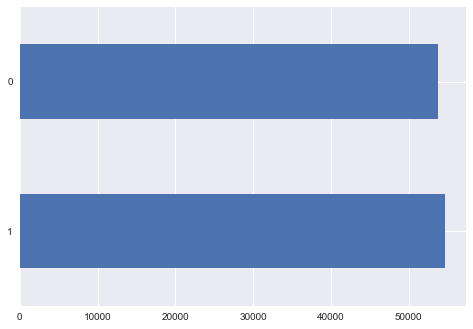

In [8]:
train_df.target.value_counts().plot(kind='barh');

In [11]:
# Standardize the data via pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [15]:
X_train = train_df.loc[:, 'feature1':'feature21']
X_test = tournament_df.loc[:, 'feature1':'feature21']
y_train = train_df.loc[:, 'target']

#### Modelling

Get a base model

In [14]:
# Cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
# Simple logistic regression
from sklearn.linear_model import LogisticRegression

# Create a pipeline
pipe_logit = Pipeline([('scaler', StandardScaler()), ('logit', LogisticRegression(C=10, n_jobs=2))])

pipe_logit_cv = cross_val_score(estimator=pipe_logit, X=X_train, y=y_train, n_jobs=2, scoring='neg_log_loss').mean()

In [18]:
# Print results
print('Avg log-loss: {:.5f}'.format(-1 * pipe_logit_cv))

Avg log-loss: 0.69262


In [22]:
# Fit our model and predict
pipe_logit_proba = pipe_logit.fit(X_train, y_train).predict_proba(X_test)

In [24]:
# Save our model
save_predictions(pipe_logit_proba, tournament_df, tournament_nbr=61)

AdaBoost w/ Logistic Regressions

In [30]:
# Scale our data
X_train_scl = sclr.fit_transform(X_train)
X_test_scl = sclr.transform(X_test)

In [55]:
# Load
from sklearn.ensemble import AdaBoostClassifier

# Create the model
ada_logit = AdaBoostClassifier(base_estimator=LogisticRegression(C=0.001), n_estimators=400).fit(X_train, y_train)

# Make predictions and save
save_predictions(ada_logit.predict_proba(X_test_scl), tournament_df, tournament_nbr=61)

Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model
gb = GradientBoostingClassifier(n_estimators=150)

# Fit the model
gb.fit(X_train_scl, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=150, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [45]:
# Make and save predictions
save_predictions(gb.predict_proba(X_test_scl), tournament_df, tournament_nbr=61)

Bagging Methods

In [61]:
from sklearn.ensemble import BaggingClassifier

bag_logit = BaggingClassifier(base_estimator=LogisticRegression(C=0.001, n_jobs=2), n_estimators=300).fit(X_train_scl, y_train)

In [62]:
# Save and make predictions
save_predictions(bag_logit.predict_proba(X_test_scl), tournament_df, tournament_nbr=61)

#### Modelling + Feature Selection and Extraction

Logistic Regression

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scl)
X_test_pca = pca.transform(X_test_scl)

In [69]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=0.001, n_jobs=2).fit(X_train_pca, y_train)
save_predictions(logit.predict_proba(X_test_pca), tournament_df, tournament_nbr=61)